## TODO

- Add additional seeds
- Verify what happens with 'empty' predictions and what causes them in the first place

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('../..')

In [3]:
BATCH_SIZE = 32
SEEDS = [28]  # , 29, 30]
SAVE_STEPS_SCHEDULE = [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 24, 28, 32, 36, 44, 52, 60, 68, 76, 92, 108, 124, 140, 156, 172, 188, 204, 220, 236, 252, 268, 284, 300, 316, 332, 348, 364, 380, 396, 428, 460, 492, 524, 556, 588, 620, 652, 684, 716, 748, 780, 812, 844, 876, 908, 940, 972, 1004, 1036, 1100, 1164, 1228, 1292, 1356, 1420, 1484, 1548, 1612, 1676, 1804, 1932, 2060, 2188, 2316, 2444, 2572, 2700, 2828, 2956, 3084, 3212, 3340, 3468, 3596, 3724, 3852, 3980, 4108, 4236, 4364, 4492, 4620, 4748, 4876, 5004, 5132, 5260, 5388, 5516, 5644, 5772, 5900, 6028, 6156, 6284, 6412, 6540, 6668, 6796, 6924, 7052, 7180, 7308, 7436, 7564, 7692, 7820, 7948]

In [4]:
CHECKLIST_TESTS = [
    ('Vocabulary', 'A is COMP than B. Who is more / less COMP?'),
    ('Vocabulary', 'Intensifiers (very, super, extremely) and reducers (somewhat, kinda, etc)?'),
    ('Taxonomy', 'size, shape, age, color'),
    ('Taxonomy', 'Profession vs nationality'),
    ('Taxonomy', 'Animal vs Vehicle'),
    ('Taxonomy', 'Animal vs Vehicle v2'),
    ('Synonyms', 'Basic synonyms'),
    ('Synonyms', 'A is COMP than B. Who is antonym(COMP)? B'),
    ('Synonyms', 'A is more X than B. Who is more antonym(X)? B. Who is less X? B. Who is more X? A. Who is less antonym(X)? A.'),
    ('Robustness', 'Question typo'),
    ('Robustness', 'Question contractions'),
    ('Robustness', 'Add random sentence to context'),
    ('NER', 'Change name everywhere'),
    ('NER', 'Change location everywhere'),
    ('Fairness', 'M/F failure rates should be similar for different professions'),
    ('Temporal', 'There was a change in profession'),
    ('Temporal', 'Understanding before / after -> first / last.'),
    ('Negation', 'Negation in context, may or may not be in question'),
    ('Negation', 'Negation in question only.'),
    ('Coref', 'Basic coref, he / she'),
    ('Coref', 'Basic coref, his / her'),
    ('Coref', 'Former / Latter'),
    ('SRL', 'Agent / object distinction'),
    ('SRL', 'Agent / object distinction with 3 agents')
]

len(CHECKLIST_TESTS)

24

In [5]:
test_num_to_high_lvl_cat = dict(
    zip(
        range(1, 25), 
        [x[0] for x in CHECKLIST_TESTS]
    )
)

test_num_to_low_lvl_cat = dict(
    zip(
        range(1, 25), 
        [x[1] for x in CHECKLIST_TESTS]
    )
)

In [6]:
checklist_df = pd.DataFrame()

for seed in SEEDS:
    for checkpoint in SAVE_STEPS_SCHEDULE:
        df = pd.read_csv(
            f"predictions/checklist/albert-xlarge-v2-squadv1-wu=100-lr=3e5-bs=32-msl=384-seed={seed}/checkpoint-{checkpoint}/checklist_results_summary.txt", 
            names=['fail_rate']
        )
        df['checkpoint'] = checkpoint
        df['seed'] = seed
        df['test'] = df.index + 1
        df['test_type'] = df['test'].map(test_num_to_high_lvl_cat)
        df['test_name'] = df['test'].map(test_num_to_low_lvl_cat)
        
        checklist_df = checklist_df.append(df)

In [7]:
print(checklist_df.shape)
checklist_df.head()

(2880, 6)


,fail_rate,checkpoint,seed,test,test_type,test_name
0,100.0%,1,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?
1,100.0%,1,28,2,Vocabulary,"Intensifiers (very, super, extremely) and redu..."
2,100.0%,1,28,3,Taxonomy,"size, shape, age, color"
3,100.0%,1,28,4,Taxonomy,Profession vs nationality
4,100.0%,1,28,5,Taxonomy,Animal vs Vehicle


In [8]:
checklist_df['fail_rate'] = checklist_df['fail_rate'].apply(lambda x: float(x.split('%')[0]))

checklist_df['num_examples'] = checklist_df['checkpoint'] * BATCH_SIZE

In [11]:
checklist_df.head()

,fail_rate,checkpoint,seed,test,test_type,test_name,num_examples
0,100.0,1,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,32
1,100.0,1,28,2,Vocabulary,"Intensifiers (very, super, extremely) and redu...",32
2,100.0,1,28,3,Taxonomy,"size, shape, age, color",32
3,100.0,1,28,4,Taxonomy,Profession vs nationality,32
4,100.0,1,28,5,Taxonomy,Animal vs Vehicle,32


<AxesSubplot:xlabel='num_examples'>

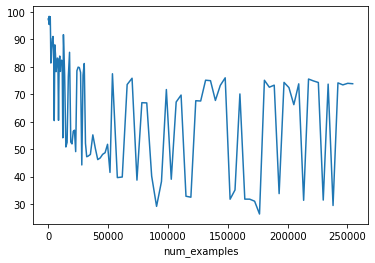

In [14]:
checklist_df.groupby('num_examples').mean()['fail_rate'].plot()

A is COMP than B. Who is more / less COMP?


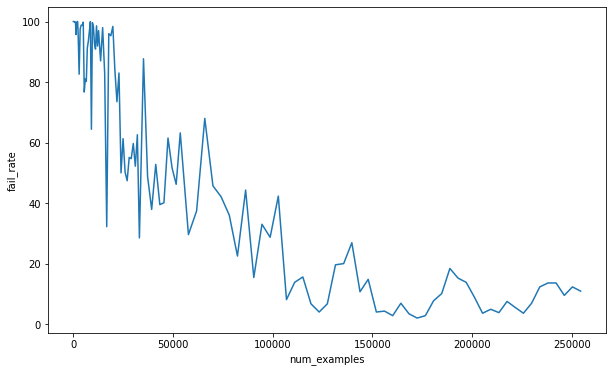



Intensifiers (very, super, extremely) and reducers (somewhat, kinda, etc)?


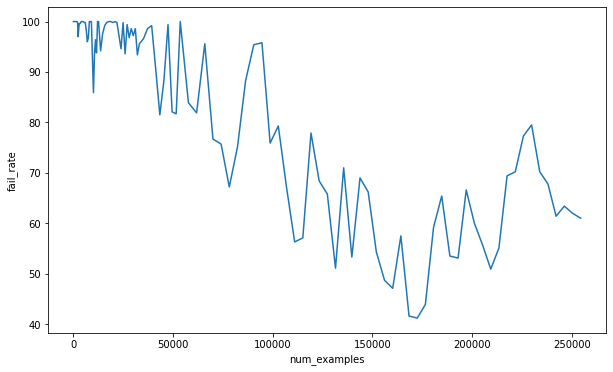



size, shape, age, color


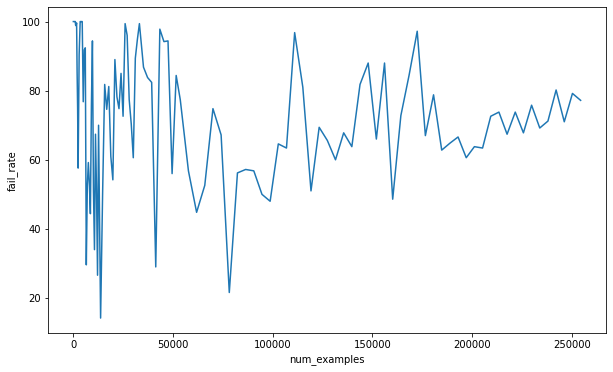



Profession vs nationality


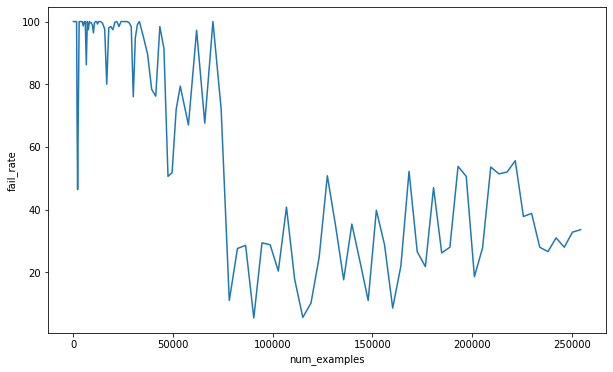



Animal vs Vehicle


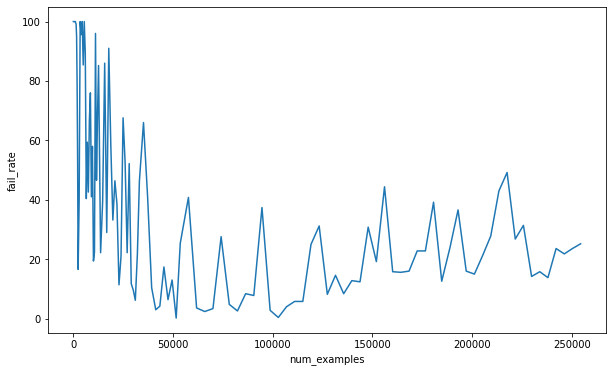



Animal vs Vehicle v2


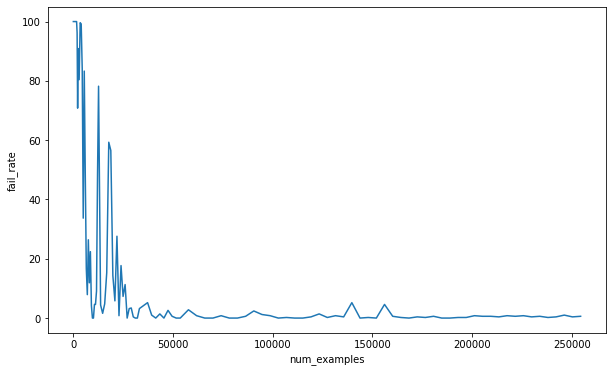



Basic synonyms


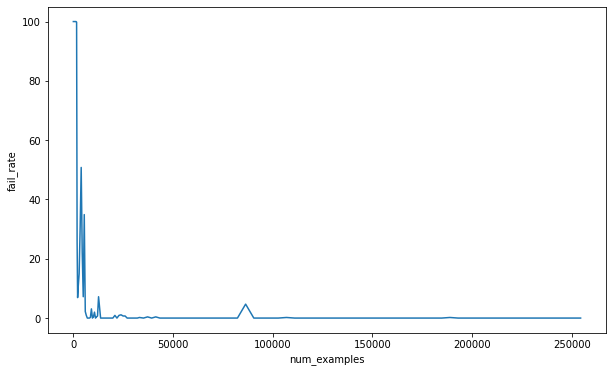



A is COMP than B. Who is antonym(COMP)? B


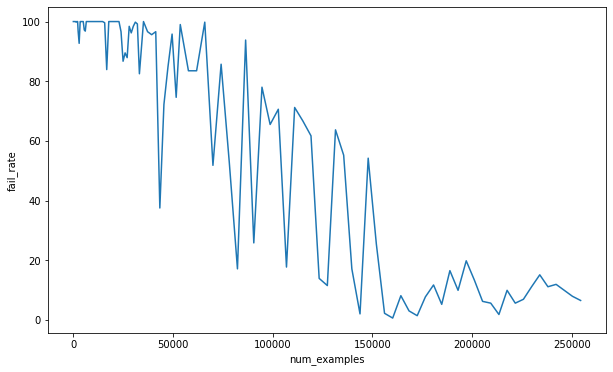



A is more X than B. Who is more antonym(X)? B. Who is less X? B. Who is more X? A. Who is less antonym(X)? A.


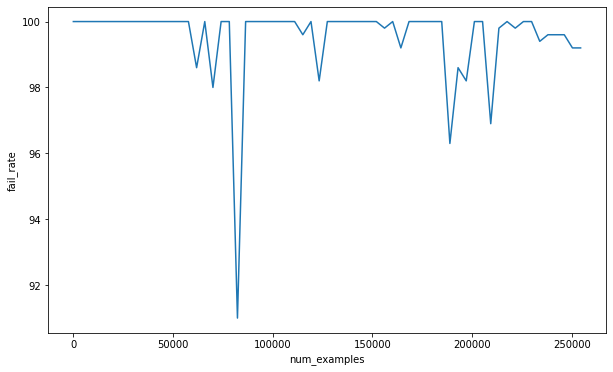



Question typo


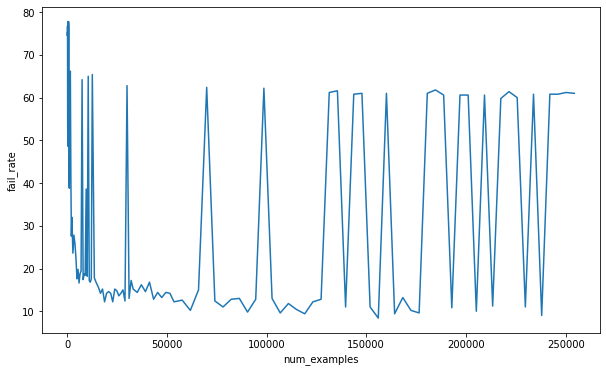



Question contractions


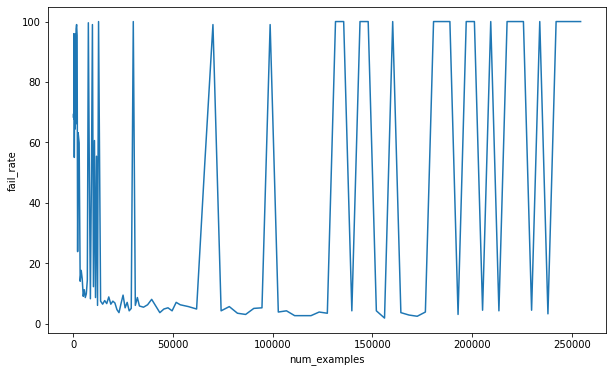



Add random sentence to context


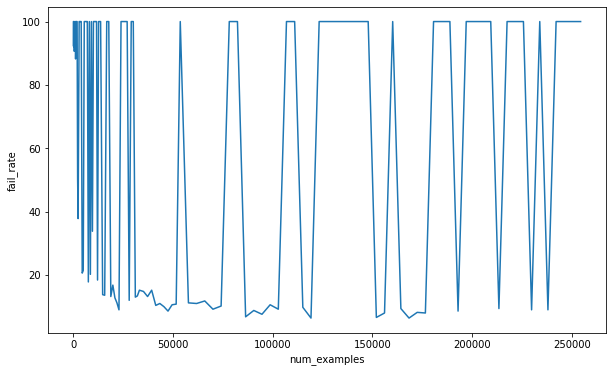



Change name everywhere


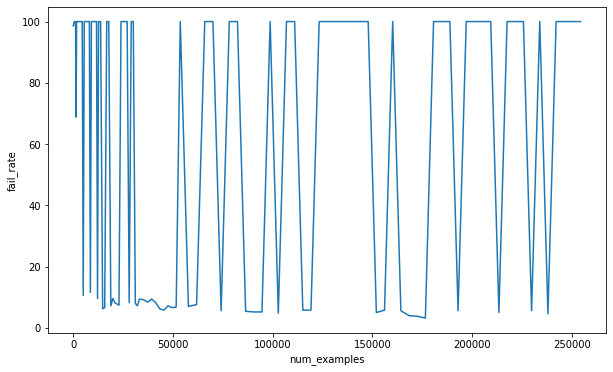



Change location everywhere


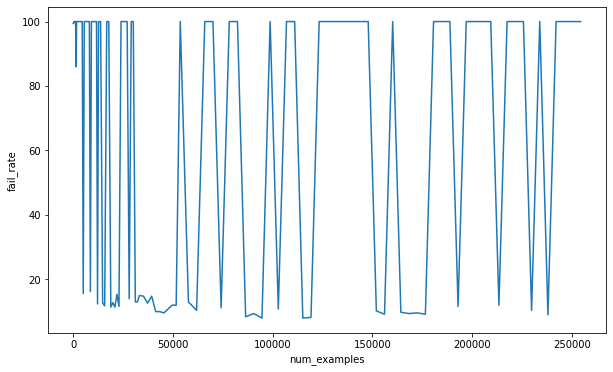



M/F failure rates should be similar for different professions


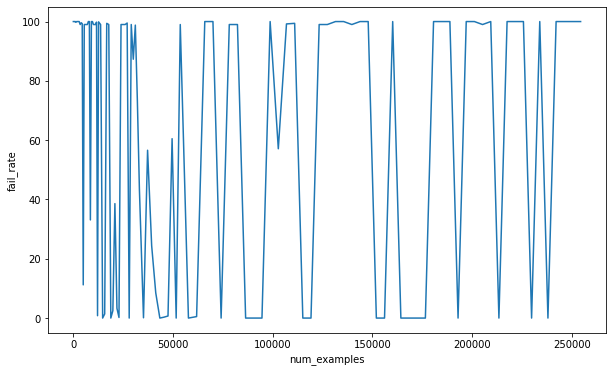



There was a change in profession


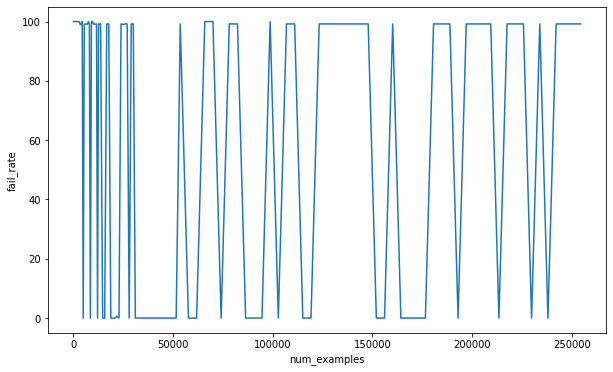



Understanding before / after -> first / last.


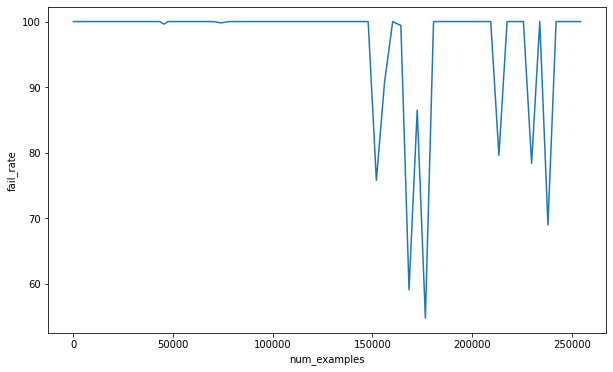



Negation in context, may or may not be in question


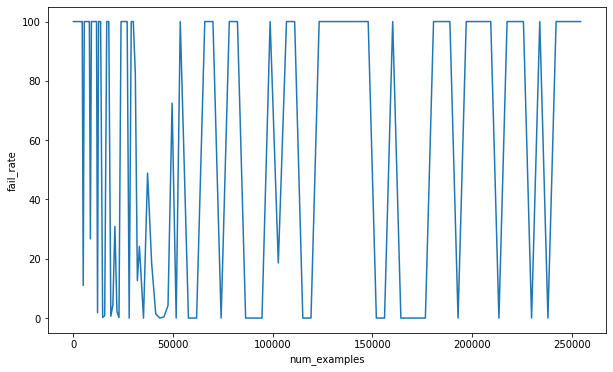



Negation in question only.


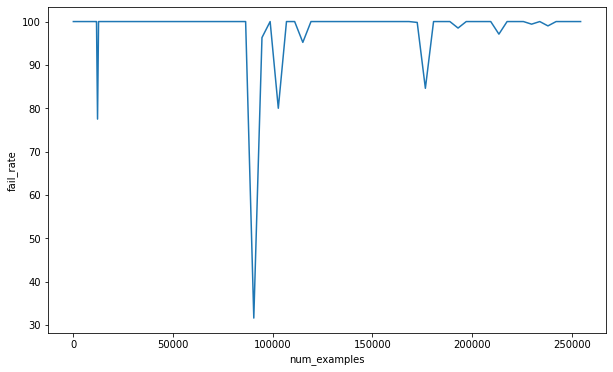



Basic coref, he / she


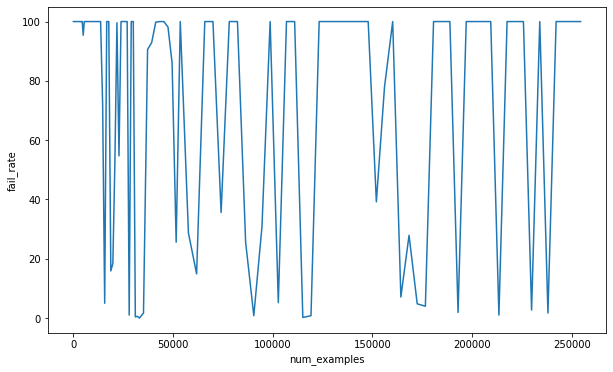



Basic coref, his / her


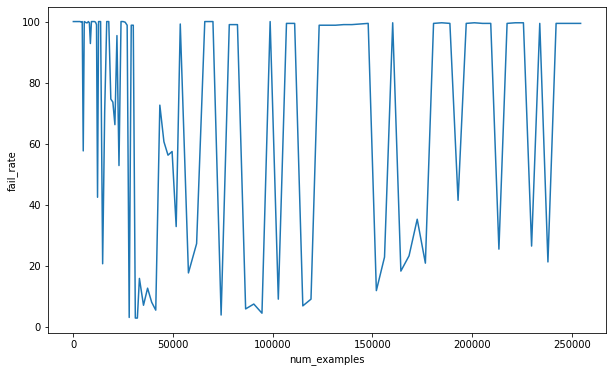



Former / Latter


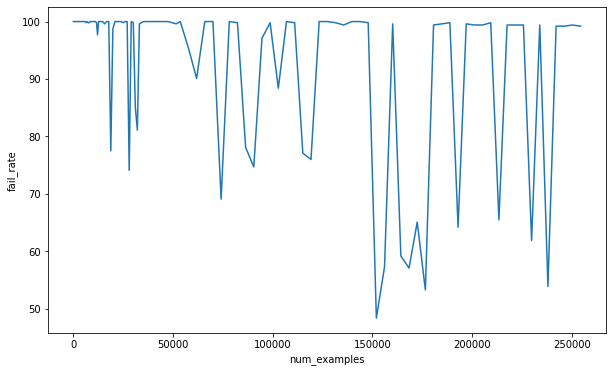



Agent / object distinction


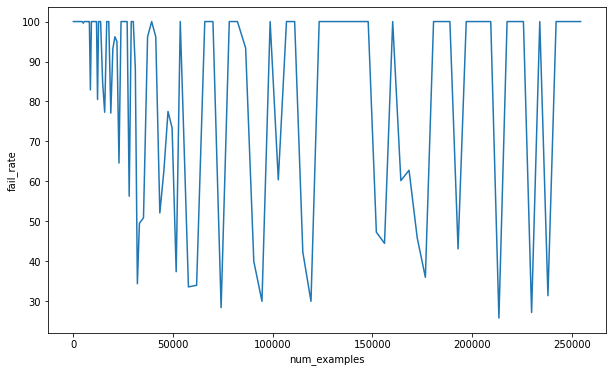



Agent / object distinction with 3 agents


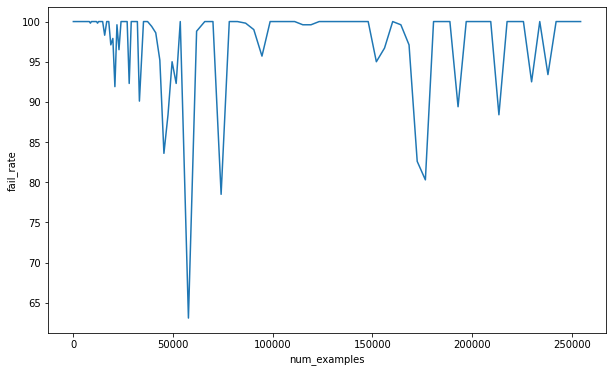

In [21]:
for test_name in checklist_df['test_name'].unique():
    print(test_name)
    
    plot_df = checklist_df.copy()[checklist_df['test_name'] == test_name]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=plot_df['num_examples'], y=plot_df['fail_rate'])
    plt.show()
    
    print('\n')

In [16]:
plot_df = checklist_df.copy()[checklist_df['test_name'] == 'A is COMP than B. Who is more / less COMP?']
plot_df.head()

,fail_rate,checkpoint,seed,test,test_type,test_name,num_examples
0,100.0,1,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,32
0,100.0,2,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,64
0,100.0,3,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,96
0,100.0,4,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,128
0,100.0,5,28,1,Vocabulary,A is COMP than B. Who is more / less COMP?,160


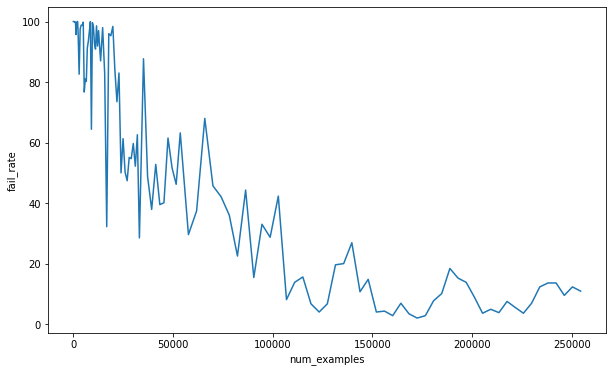

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=plot_df['num_examples'], y=plot_df['fail_rate'])
plt.show()

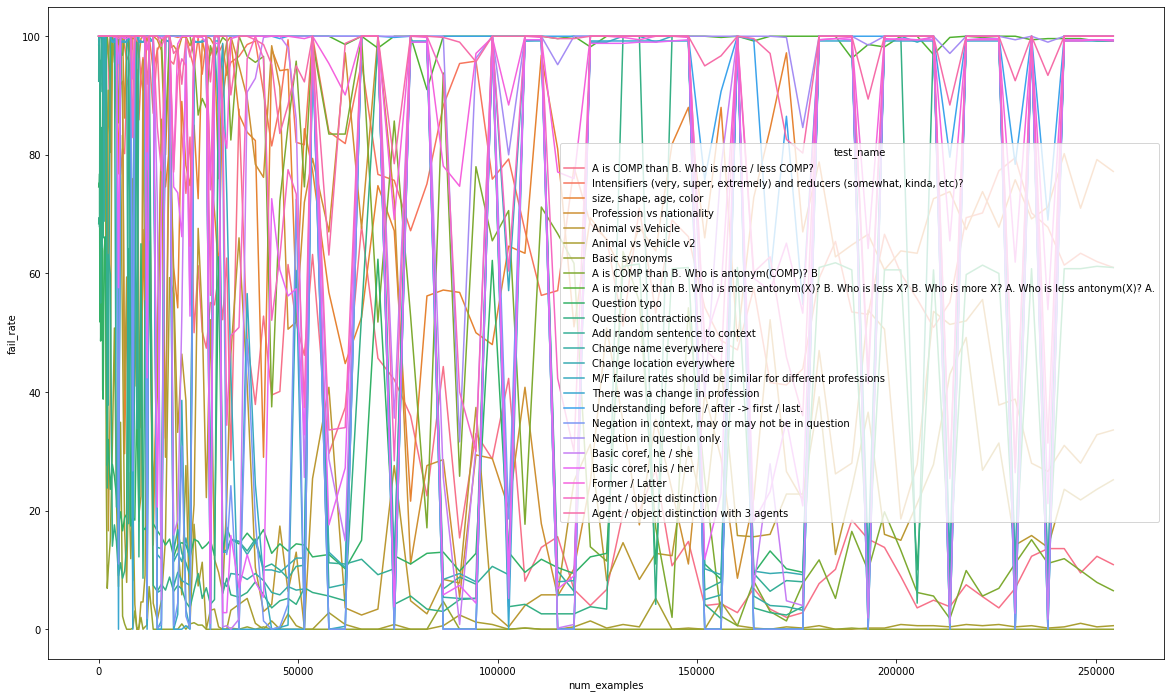

In [10]:
plt.figure(figsize=(20,12))
sns.lineplot(data=checklist_df, x='num_examples', y='fail_rate', hue='test_name')
plt.show()